In [1]:

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np



import random
import tensorflow
from tensorflow.keras.preprocessing.image import img_to_array, load_img



import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization


#for display
from IPython.display import display,Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

#check train size
#X_train.shape
# check test size 
#X_test.shape

# no need 2 dimantion flat to one  
#y_train = y_train.reshape(-1,)
#y_test = y_test.reshape(-1,)

In [3]:
# test function #xtrain ytrain 
def plot_sample(X, y, index):
    classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
    #size  
    plt.figure(figsize = (15,2))
    #imgshow
    plt.imshow(X[index])
    
    display(X[index])
    
    #name tag
    plt.xlabel(classes[y[index]])

In [4]:
#plot_sample(X_train, y_train,0)

In [5]:
#normalize tp 0~1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
# Convert both X_train and X_test to grayscale
#import cv2
#X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
#X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])

In [7]:
from tensorflow.keras.utils import to_categorical

In [8]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [9]:
#from tensorflow.keras.callbacks import EarlyStopping

#early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [10]:

'''
cnn = models.Sequential([
    #popular activation in multi-classification relu and softmax
    # detect 32 different features filter size 3,3  input data is 32*32*RGB
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    # popular pulling matter 2 by 2
    layers.MaxPooling2D((2, 2)),
       
    
    #additional convolution 
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    #additional convolution 
    #layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    #layers.MaxPooling2D((2, 2)),
    
    #additional convolution 
    #layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu'),
    #layers.MaxPooling2D((2, 2)),
    
    
    # flatten data for cnn
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    #final layer result 10 classes 
    layers.Dense(10, activation='softmax')
])

print(cnn.summary())
'''
model = Sequential()


model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))




In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.15, height_shift_range=0.15, horizontal_flip=True)#,zoom_range=[0.6,0.9])
train_generator = data_generator.flow(X_train, y_cat_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

In [13]:
#adam is popular good accuracy



model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')


#more epoch more accuracy maybe..
#history =cnn.fit(X_train, y_train, epochs=10,verbose=1)
history = model.fit(train_generator, 
              epochs=50,
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_test, y_cat_test), 

             )
            

    
#cnn.evaluate(X_test,y_test)

Epoch 1/50
1562/1562 [==============================] - 31s 16ms/step - loss: 1.9543 - accuracy: 0.2980 - val_loss: 1.5849 - val_accuracy: 0.4300
Epoch 2/50
1562/1562 [==============================] - 24s 15ms/step - loss: 1.3898 - accuracy: 0.4962 - val_loss: 1.3020 - val_accuracy: 0.5547
Epoch 3/50
1562/1562 [==============================] - 24s 15ms/step - loss: 1.1637 - accuracy: 0.5884 - val_loss: 0.8759 - val_accuracy: 0.6962
Epoch 4/50
1562/1562 [==============================] - 24s 15ms/step - loss: 1.0254 - accuracy: 0.6426 - val_loss: 1.0284 - val_accuracy: 0.6632
Epoch 5/50
1562/1562 [==============================] - 24s 15ms/step - loss: 0.9342 - accuracy: 0.6767 - val_loss: 0.7935 - val_accuracy: 0.7301
Epoch 6/50
1562/1562 [==============================] - 24s 15ms/step - loss: 0.8797 - accuracy: 0.6992 - val_loss: 0.8512 - val_accuracy: 0.7145
Epoch 7/50
1562/1562 [==============================] - 24s 16ms/step - loss: 0.8166 - accuracy: 0.7223 - val_loss: 0.7255 -

In [14]:
evaluation = model.evaluate(X_test, y_cat_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

313/313 [==============================] - 2s 5ms/step - loss: 0.4218 - accuracy: 0.8653
Test Accuracy : 86.53%


In [15]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = np.argmax(model.predict(X_test), axis=-1)

cm = confusion_matrix(y_test, y_pred)

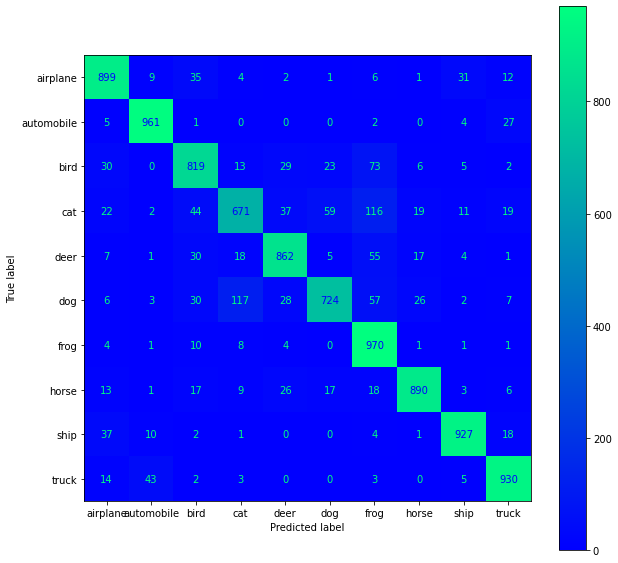

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)

fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='horizontal', ax=ax,cmap='winter')

plt.show()

"\nplt.subplot(4, 2, 4)\nplt.plot(history.history['recall'], label='recall')\nplt.plot(history.history['val_recall'], label='val_recall')\nplt.title('Recall Function')\nplt.legend()\n"

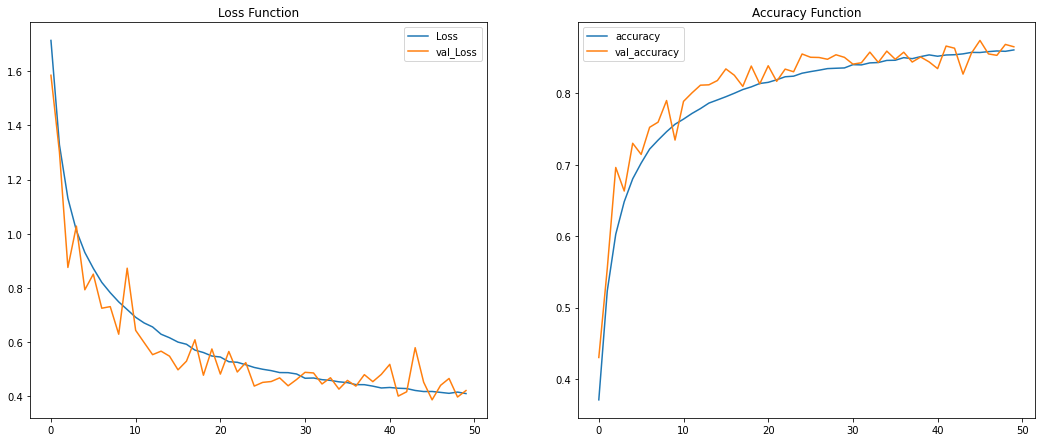

In [17]:
plt.figure(figsize=(18, 16))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.title('Loss Function')
plt.legend()


plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function')
plt.legend()


In [18]:
'''
#history dict available
history_dict = history.history
print(history_dict.keys())

#graph check #epoch and loss
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('model loss')
#plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train'], loc='upper left')
#plt.legend(['validation'], loc='upper right')
plt.show()
'''

"\n#history dict available\nhistory_dict = history.history\nprint(history_dict.keys())\n\n#graph check #epoch and loss\nplt.plot(history.history['loss'])\nplt.plot(history.history['accuracy'])\nplt.title('model loss')\n#plt.ylabel('loss')\nplt.xlabel('epoch')\n#plt.legend(['train'], loc='upper left')\n#plt.legend(['validation'], loc='upper right')\nplt.show()\n"

In [37]:
# Get list of layers from model
layer_outputs = [layer.output for layer in model.layers[1:]]

# Create a visualization model
visualize_model = tensorflow.keras.models.Model(inputs = model.input, outputs = layer_outputs)

# Load image for prediction
img=load_img('C:/Users/wmens/.keras/datasets/cifar10/cifar10/test/ship/0001.png',target_size=(32,32))


In [38]:
# Convert image to array
testImg = img_to_array(img)

# Print shape of array
print(testImg.shape)

(32, 32, 3)


In [39]:
# Reshape image for passing it to prediction
testImg=testImg.reshape((1,32,32,3))
testImgCam=testImg
# Print shape of array
print(testImg.shape)

(1, 32, 32, 3)


In [40]:
# Rescale the image
testImg = testImg /255 

In [41]:
# Get all layers feature maps for image
feature_maps=visualize_model.predict(testImg)

In [42]:

# Show names of layers available in model
layer_names = [layer.name for layer in model.layers]
print(layer_names)

['conv2d', 'batch_normalization', 'conv2d_1', 'batch_normalization_1', 'max_pooling2d', 'dropout', 'conv2d_2', 'batch_normalization_2', 'conv2d_3', 'batch_normalization_3', 'max_pooling2d_1', 'dropout_1', 'conv2d_4', 'batch_normalization_4', 'conv2d_5', 'batch_normalization_5', 'max_pooling2d_2', 'dropout_2', 'flatten', 'dense', 'dropout_3', 'dense_1']


(1, 32, 32, 32)
(1, 32, 32, 32)
(1, 32, 32, 32)
(1, 16, 16, 32)
(1, 16, 16, 32)
(1, 16, 16, 64)
(1, 16, 16, 64)
(1, 16, 16, 64)
(1, 16, 16, 64)
(1, 8, 8, 64)


<ipython-input-43-674e5ecc112d>:13: RuntimeWarning: divide by zero encountered in true_divide
  testImg /= testImg.std()
<ipython-input-43-674e5ecc112d>:13: RuntimeWarning: invalid value encountered in true_divide
  testImg /= testImg.std()


(1, 8, 8, 64)
(1, 8, 8, 128)
(1, 8, 8, 128)
(1, 8, 8, 128)
(1, 8, 8, 128)
(1, 4, 4, 128)
(1, 4, 4, 128)
(1, 2048)
(1, 128)
(1, 128)
(1, 10)


<ipython-input-43-674e5ecc112d>:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(scale * channels, scale))


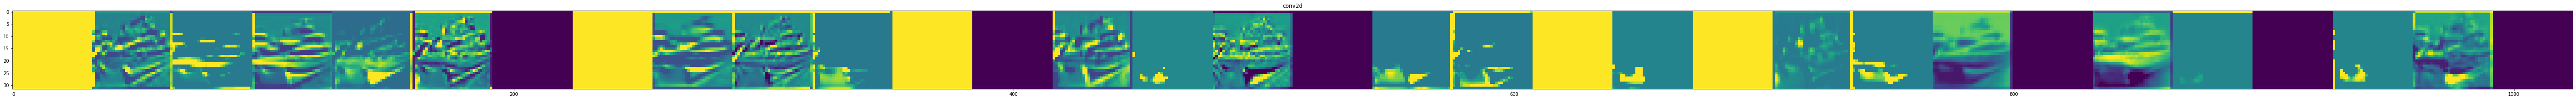

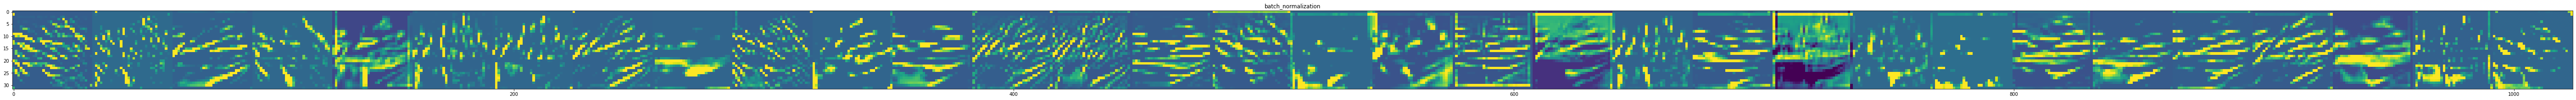

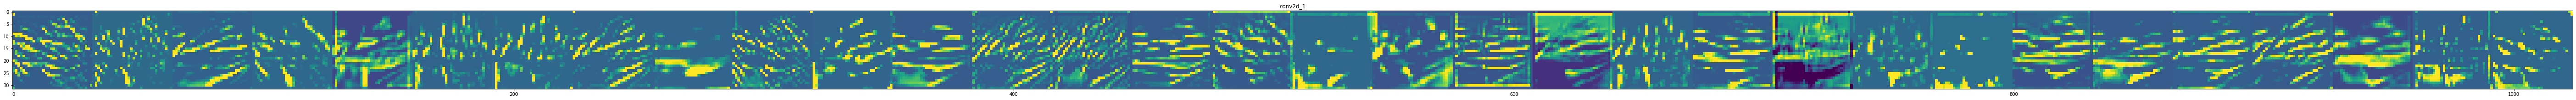

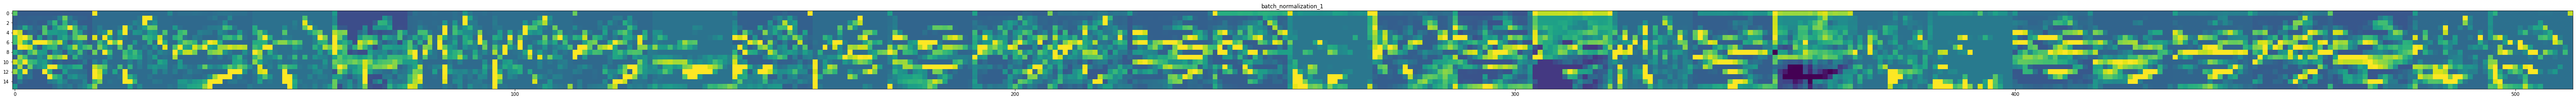

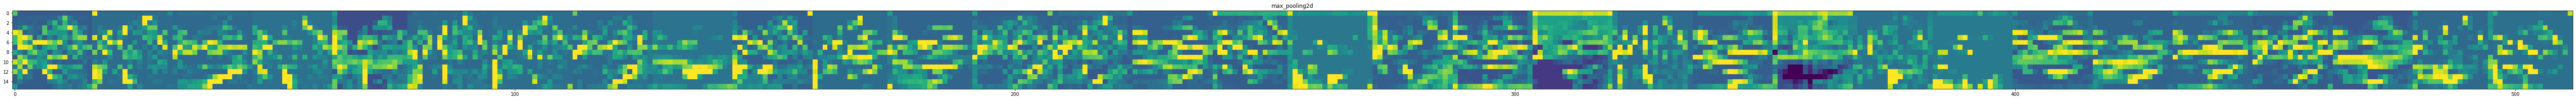

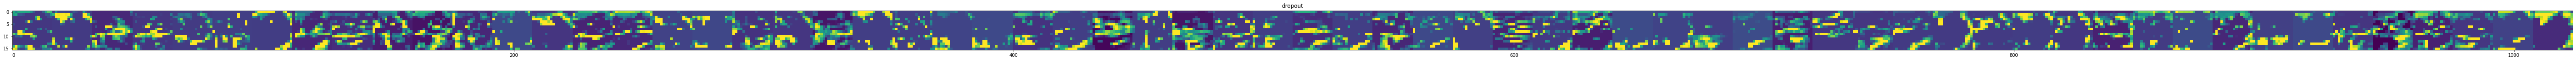

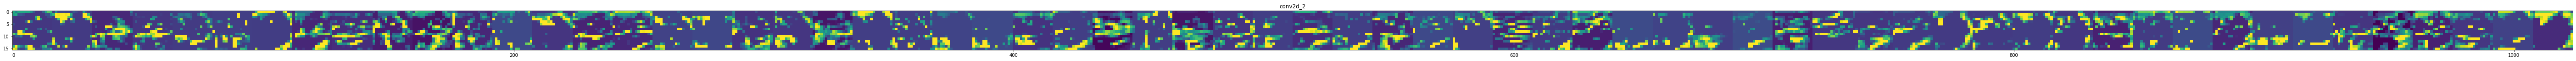

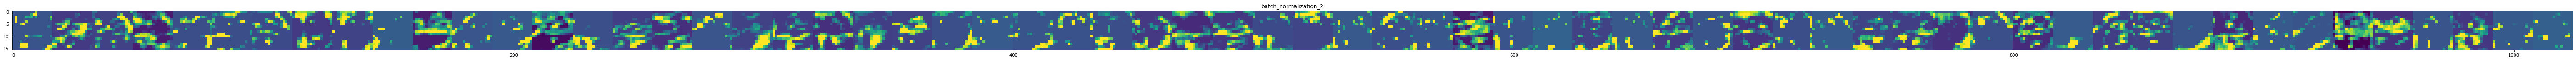

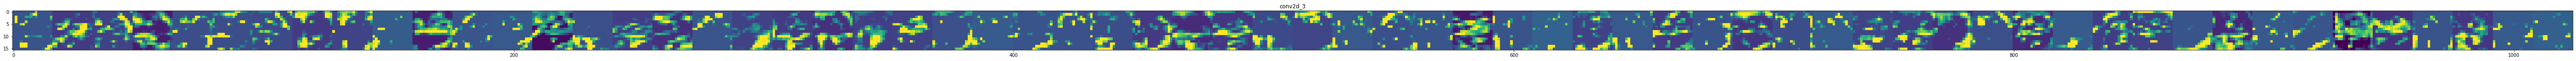

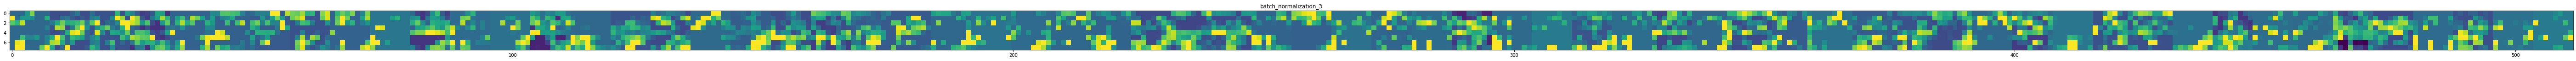

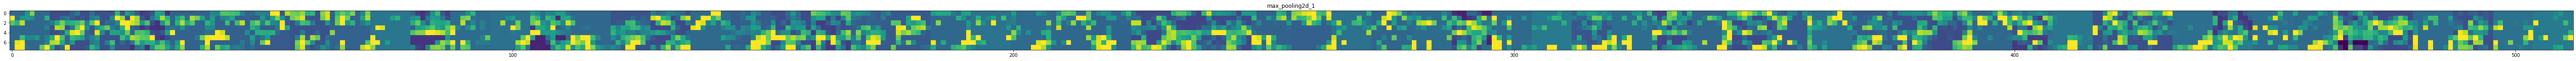

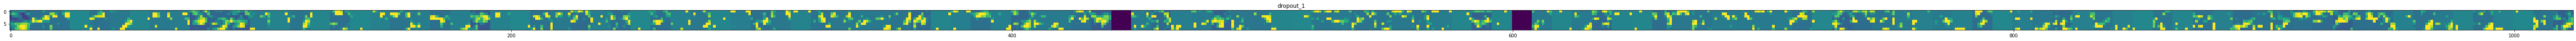

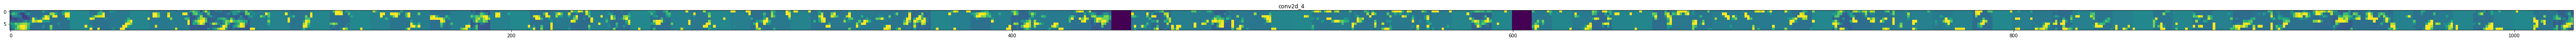

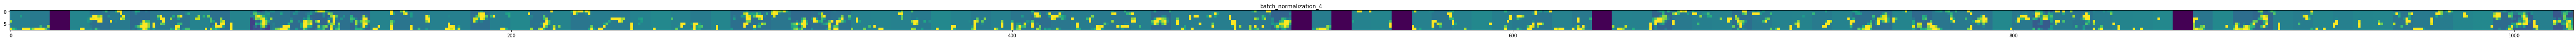

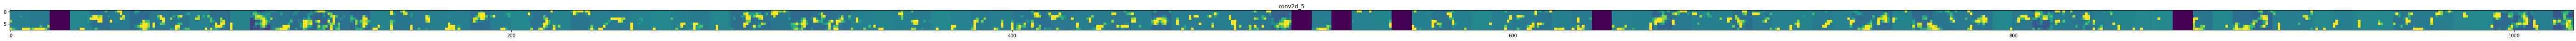

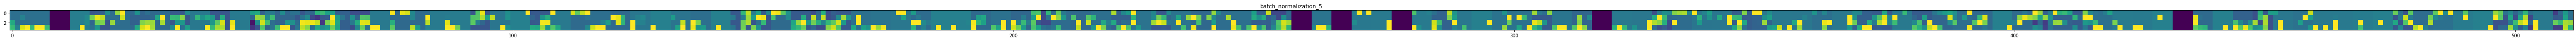

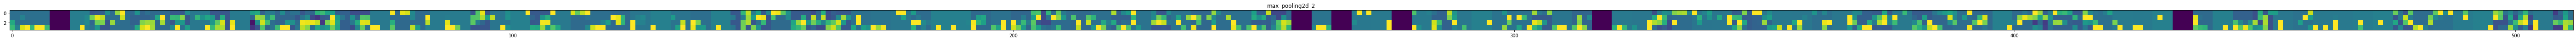

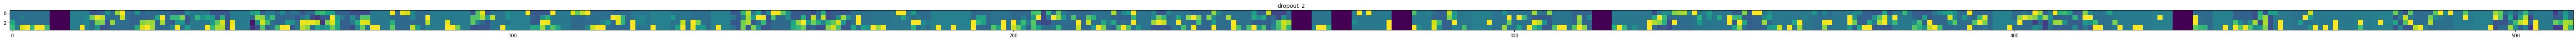

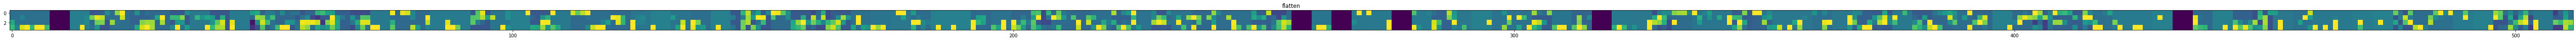

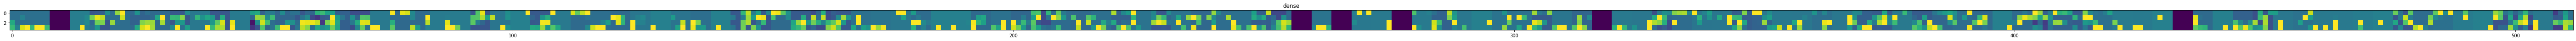

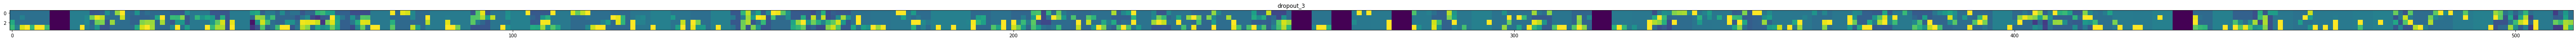

In [43]:
# Plotting the graph
for layer_names, feature_maps in zip(layer_names,feature_maps):
    print(feature_maps.shape)
    #shape 4 is for plotting graph
    #skip dense layer
    if len(feature_maps.shape) == 4 :
        channels = feature_maps.shape[-1]
        size = feature_maps.shape[1]
        display_grid = np.zeros((size, size * channels))
        for i in range(channels):
            testImg = feature_maps[0, :, :, i]
            testImg -= testImg.mean()
            testImg /= testImg.std()
            testImg *= 64
            testImg += 128
            testImg = np.clip(testImg, 0, 255).astype('uint8')
            # We'll tile each filter into this big horizontal grid
            display_grid[:, i * size : (i + 1) * size] = testImg

    scale = 100. / channels
    plt.figure(figsize=(scale * channels, scale))
    plt.title(layer_names)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')




In [44]:

#predication result 
y_pred = model.predict(X_test)
y_classes = [np.argmax(element) for element in y_pred] 

array([[[0.92156863, 0.92156863, 0.92156863],
        [0.90588235, 0.90588235, 0.90588235],
        [0.90980392, 0.90980392, 0.90980392],
        ...,
        [0.91372549, 0.91372549, 0.91372549],
        [0.91372549, 0.91372549, 0.91372549],
        [0.90980392, 0.90980392, 0.90980392]],

       [[0.93333333, 0.93333333, 0.93333333],
        [0.92156863, 0.92156863, 0.92156863],
        [0.92156863, 0.92156863, 0.92156863],
        ...,
        [0.9254902 , 0.9254902 , 0.9254902 ],
        [0.9254902 , 0.9254902 , 0.9254902 ],
        [0.92156863, 0.92156863, 0.92156863]],

       [[0.92941176, 0.92941176, 0.92941176],
        [0.91764706, 0.91764706, 0.91764706],
        [0.91764706, 0.91764706, 0.91764706],
        ...,
        [0.92156863, 0.92156863, 0.92156863],
        [0.92156863, 0.92156863, 0.92156863],
        [0.91764706, 0.91764706, 0.91764706]],

       ...,

       [[0.34117647, 0.38823529, 0.34901961],
        [0.16862745, 0.2       , 0.14509804],
        [0.0745098 , 0

TypeError: only integer scalar arrays can be converted to a scalar index

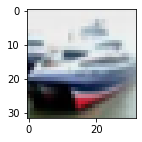

In [61]:
# print predicted answer
plot_sample(X_test, y_test,1) # input index

In [62]:
#print answer
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
print(classes[y_classes[1]])

ship


In [63]:

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()
    

In [76]:

def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array
    

In [87]:

def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = plt.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)
        # Display Grad CAM
    display(Image(cam_path))
    

In [93]:

import os
import cv2
from tensorflow import keras

DIRPATH = "/test"
EX="/ship/0001.png"
myFile = os.path.abspath("./"+DIRPATH+EX) 
    
img_path= keras.utils.get_file(
    # get local data 
      "somthing2.png","file://"+"/"+myFile
)
img_size=(32,32)

# Prepare image
img_array = get_img_array(img_path, size=img_size)

# Remove last layer's softmax
#model.layers[-1].activation = None



8192/2154 [==================================================================================================================] - 0s 0s/step


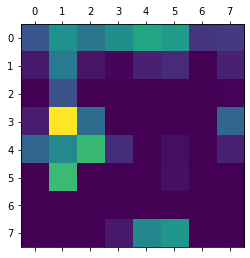

In [94]:

last_conv_layer_name="conv2d_5"
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()


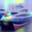

In [95]:

cmaImg=save_and_display_gradcam(img_path, heatmap)
